In [41]:
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns

In [42]:
sentences = pd.read_csv("/data/semeval-2020/task-11/processed/sentence_dataset_v2.csv")

## Count of articles

In [43]:
len(set(sentences.article_id.values))

371

### Average , min , max Sentence per article

In [44]:
sentence_count_by_article = sentences.groupby("article_id")["sentence_id"].agg("count")

In [45]:
np.mean(sentence_count_by_article.values)

41.94070080862534

In [46]:
np.min(sentence_count_by_article.values)

4

In [47]:
np.max(sentence_count_by_article.values)

436

### Average , min , max words in article

In [48]:
def get_word_count(sentence):
    return len(sentence.split(" "))

In [49]:
sentences["word_count"] = sentences["cleaned_sentence"].apply(get_word_count)

In [50]:
wordcount_per_article = sentences.groupby("article_id")["word_count"].agg("sum")

In [51]:
np.mean(wordcount_per_article.values)

964.7493261455526

In [52]:
np.min(wordcount_per_article.values)

109

In [53]:
np.max(wordcount_per_article.values)

8005

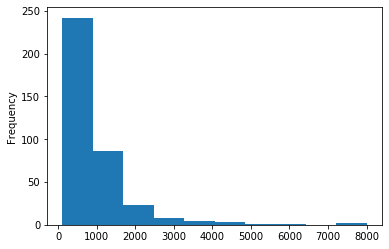

In [77]:
wordcount_per_article.plot(kind="hist")

### Average , min , max words in sentence

In [54]:
np.mean(sentences["word_count"].values)

23.002699228791773

In [55]:
np.min(sentences["word_count"].values)

1

In [56]:
np.max(sentences["word_count"].values)

159

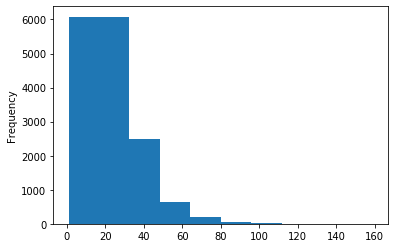

In [75]:
sentences["word_count"].plot(kind="hist")

### Number of sentence with propaganda

In [57]:
sentences["has_propaganda"].value_counts()

False    10608
True      4952
Name: has_propaganda, dtype: int64

### Percentage of words sentence part of propaganda in sentences that has propaganda

In [58]:
def compute_words_with_propaganda(sentence):
    count_of_propaganda_spans = 0
    propaganda_words_count = 0
    for ix,w in enumerate(sentence.split(" ")):
        if(w.find("<span") > -1):
            count_of_propaganda_spans += 1
        elif(w.find("/span>") > -1):
            count_of_propaganda_spans -= 1
        else:
            if count_of_propaganda_spans > 0:
                propaganda_words_count += 1
            if count_of_propaganda_spans == -1:
                propaganda_words_count = ix + 1
    if count_of_propaganda_spans == -1:
        propaganda_words_count = ix + 1        
    return propaganda_words_count            

In [59]:
sentences["propaganda_words_count"] = sentences["sentence"].apply(compute_words_with_propaganda)

In [60]:
sentences[(sentences["propaganda_words_count"] > 0) & (sentences["has_propaganda"] == False)]

,article_id,sentence_id,sentence,has_propaganda,cleaned_sentence,word_count,propaganda_words_count


In [61]:
sentences[(sentences["propaganda_words_count"] == 0) & (sentences["has_propaganda"] == True)]

,article_id,sentence_id,sentence,has_propaganda,cleaned_sentence,word_count,propaganda_words_count
535,723537899,10,8-/span> <span-5 Does not the Syrian governmen...,True,Does not the Syrian government have a point?,10,0
544,723537899,19,7-/span> 5-/span>Will they support a clash wit...,True,Will they support a clash with NATO ally Turk...,24,0
1067,735855251,18,10-/span> <span-6 Because of the tireless effo...,True,Because of the tireless efforts of these pro...,18,0
1164,111111113,30,"8-/span> <span-11 BUILD THE WALL!""",True,"BUILD THE WALL!""",5,0
1717,730149656,27,"During the clip, Farrakhan repeatedly labels t...",True,"During the clip, Farrakhan repeatedly labels t...",14,0
...,...,...,...,...,...,...,...
15410,766632016,39,So was it <span-10 <span-8 annihilation10-/spa...,True,So was it annihilation ?,7,0
15412,766632016,41,Who did Hitler <span-10 <span-8 annihilate10-/...,True,Who did Hitler annihilate ?,7,0
15421,766632016,50,Was there <span-10 <span-8 annihilation10-/spa...,True,Was there annihilation ?,6,0
15423,766632016,52,Many races were <span-10 <span-8 annihilated10...,True,Many races were annihilated .,7,0


In [62]:
sentences[(sentences["propaganda_words_count"] == 0) & (sentences["has_propaganda"] == True)].sentence.values

array(['8-/span> <span-5 Does not the Syrian government have a point?',
       "7-/span> 5-/span>Will they support a clash with NATO ally Turkey, to keep armed Kurds on Turkey's border, when the Turks regard them as terrorists?",
       '10-/span> <span-6 Because of the tireless efforts of these professional officers, there are fewer criminals in our communities.”',
       '8-/span> <span-11 BUILD THE WALL!"',
       'During the clip, Farrakhan repeatedly labels the Jewish people “<span-9 <span-10 <span-1 Satan9-/span>10-/span> 1-/span>.”',
       'No, that’s <span-10 <span-9 <span-8 Satan10-/span>9-/span> 8-/span>.',
       'You should learn to call them by their real name, ‘<span-10 <span-9 <span-8 Satan10-/span>9-/span> 8-/span>.’',
       '5-/span> <span-3 Do we accept that outcome, pack up and go home?',
       '3-/span> 1-/span>Sunday\'s editorial in The Washington Post, "The Next Mideast Wars," raises the crucial questions now before us.',
       'Attorney General Lynch’s <span-

In [63]:
propaganda_sentences = sentences[(sentences["propaganda_words_count"] > 0) & (sentences["has_propaganda"] == True)]

In [65]:
propaganda_sentences["propaganda_percentage_words"] = (propaganda_sentences["propaganda_words_count"] / propaganda_sentences["word_count"]) *100

### Average percentage of propaganda words in a sentence

In [68]:
propaganda_sentence_stats = propaganda_sentences.propaganda_percentage_words

In [69]:
np.mean(propaganda_sentence_stats)

43.89995221838387

In [70]:
np.min(propaganda_sentence_stats)

1.0309278350515463

In [71]:
np.max(propaganda_sentence_stats)

100.0

### Distribution of percentage of words 

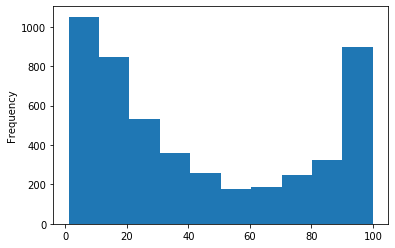

In [72]:
propaganda_sentence_stats.plot(kind='hist')